In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

In [5]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
df[['Deck', 'Number', 'Side']] = df['Cabin'].str.split("/", expand=True)

In [7]:
df = df.drop(['PassengerId','Name','Cabin','Number'],axis=1)

In [8]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Side', ylabel='count'>

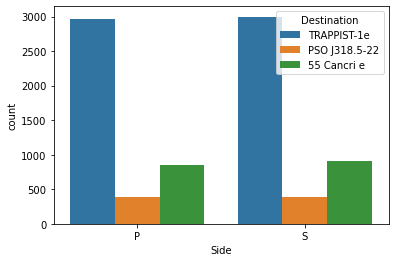

In [16]:
sns.countplot(df['Side'],hue = df['Destination'])

In [17]:
df['RoomService'] = df['RoomService'].fillna(0)
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)
df['HomePlanet'] = df['HomePlanet'].fillna('Earth')
df['CryoSleep'] = df['CryoSleep'].fillna(False)
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')
df['VIP'] = df['VIP'].fillna(False)
df['Age'] = df['Age'].fillna(27)
df['Deck'] = df['Deck'].fillna('T')
df['Side'] = df['Side'].fillna('S')

In [18]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

In [19]:
df.shape

(8693, 13)

In [20]:
labelenc = LabelEncoder()

In [21]:
df['HomePlanet']=labelenc.fit_transform(df['HomePlanet'])

In [22]:
df['CryoSleep']=labelenc.fit_transform(df['CryoSleep'])
df['Destination']=labelenc.fit_transform(df['Destination'])
df['VIP']=labelenc.fit_transform(df['VIP'])
df['Deck']=labelenc.fit_transform(df['Deck'])
df['Side']=labelenc.fit_transform(df['Side'])


In [23]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,6,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,6,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,4,1


In [24]:
X = df.drop('Transported',axis=1)
y = df['Transported']

In [25]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1


In [26]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [27]:
# Clustering
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [28]:
wcss = []  # initializing an empty list

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  # initializing the KMeans object
    kmeans.fit(X)  # fitting the data to the KMeans Algorithm
    wcss.append(kmeans.inertia_)

    # finding the value of the optimum cluster programmatically
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [29]:
kn.knee

4

In [30]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)  # divide data into clusters
X['Cluster']=y_kmeans


In [31]:
X['Transported']=df['Transported']

In [32]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,Cluster,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1,0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,3,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,3,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,2,False
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,6,1,0,False
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,6,1,0,True
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,1,0,False


In [33]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [34]:
silhouette_score(X.drop('Cluster',axis=1),kmeans.labels_)

0.7836318678556837

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


def get_best_params_for_random_forest(train_x, train_y):
    
    clf = RandomForestClassifier()
    
    # initializing with different combination of parameters
    param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 7, 1), "max_features": ['auto', 'log2']}

    # Creating an object of the Grid Search class
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=3)
    # finding the best parameters
    grid.fit(train_x, train_y)

    # extracting the best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']

    # creating a new model with the best parameters
    clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                                              max_depth=max_depth, max_features=max_features)
    # training the mew model
    clf.fit(train_x, train_y)
    return clf
        

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [36]:
def get_best_params_for_xgboost(train_x, train_y):
    xgb = XGBClassifier(objective='binary:logistic')
    # initializing with different combination of parameters
    param_grid_xgboost = {
                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [3, 5, 10, 20],
                'n_estimators': [10, 50, 100, 200]}
    # Creating an object of the Grid Search class
    grid = GridSearchCV(XGBClassifier(objective='binary:logistic'), param_grid_xgboost, verbose=3,
                                     cv=5)
    # finding the best parameters
    grid.fit(train_x, train_y)

    # extracting the best parameters
    learning_rate = grid.best_params_['learning_rate']
    max_depth = grid.best_params_['max_depth']
    n_estimators = grid.best_params_['n_estimators']

    # creating a new model with the best parameters
    xgb = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth,
                                     n_estimators=n_estimators)
    # training the mew model
    xgb.fit(train_x, train_y)
    return xgb

In [37]:
def get_best_model(train_x, test_x, train_y, test_y):
    # create best model for XGBoost
        xgboost = get_best_params_for_xgboost(train_x, train_y)
        prediction_xgboost = xgboost.predict(test_x)  # Predictions using the XGBoost Model

        if len(test_y.unique()) == 1:  # if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
            xgboost_score = accuracy_score(test_y, prediction_xgboost)
        else:
            xgboost_score = roc_auc_score(test_y, prediction_xgboost)  # AUC for XGBoost

        # create best model for Random Forest
        random_forest = get_best_params_for_random_forest(train_x, train_y)
        prediction_random_forest = random_forest.predict(test_x)  # prediction using the Random Forest Algorithm

        if len(test_y.unique()) == 1:  # if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
            random_forest_score = accuracy_score(test_y, prediction_random_forest)
        else:
            random_forest_score = roc_auc_score(test_y, prediction_random_forest)  # AUC for Random Forest
                
        # comparing the two models
        if random_forest_score < xgboost_score:
            return 'Xgboost',xgboost
        else:
            return 'RF',random_forest

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Cluster1

for i in range(4):
    cluster_data = X[X['Cluster'] == i]  # filter the data for one cluster

    # Prepare the feature and Label columns
    cluster_features = cluster_data.drop(['Transported', 'Cluster'], axis=1)
    cluster_label = cluster_data['Transported']

    # splitting the data into training and test set for each cluster one by one
    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.1, random_state=42)
    
    #best model
    model_name,model = get_best_model(x_train, x_test, y_train, y_test)
    filename = model_name + str(i)
    with open(filename + '.sav','wb') as f:
        pickle.dump(model, f)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.799 total time=   4.2s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.762 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.788 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.786 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.776 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.798 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.767 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.797 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.798 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.779 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.803 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.772 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.791 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.791 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.783 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.795 total time=   0.9s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.769 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.785 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.786 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.781 total time=   0.4s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.814 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.762 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.799 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.785 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.788 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.796 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.773 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.797 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.786 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.776 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.790 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.778 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.789 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.776 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.773 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.789 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.770 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.784 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.788 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.768 total time=   0.6s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.792 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.766 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.796 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.784 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.772 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.794 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.773 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.791 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.786 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.762 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.786 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.766 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.786 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.781 total time=   0.9s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.769 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.781 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.763 total time=   1.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.787 total time=   1.8s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.779 total time=   1.9s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.760 total time=   1.1s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.792 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.765 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.792 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.781 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.761 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.788 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.769 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.790 total time=   0.8s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.777 total time=   0.9s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.764 total time=   1.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.775 total time=   1.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.771 total time=   1.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.795 total time=   1.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.780 total time=   1.8s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.764 total time=   1.8s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.779 total time=   2.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.764 total time=   2.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.786 total time=   2.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.779 total time=   2.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.761 total time=   2.1s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.782 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.755 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.760 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.759 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.748 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.797 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.758 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.795 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.785 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.779 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.799 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.762 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.800 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.794 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.783 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.810 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.762 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.797 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.798 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.791 total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.792 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.748 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.789 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.764 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.768 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.811 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.762 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.795 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.785 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.783 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.806 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.766 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.795 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.792 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.778 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.802 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.771 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.792 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.788 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.781 total time=   1.3s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.795 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.764 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.788 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.772 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.762 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.800 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.775 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.790 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.785 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.781 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.793 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.767 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.793 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.790 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.783 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.794 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.770 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.792 total time=   2.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.788 total time=   1.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.779 total time=   1.8s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.777 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.758 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.788 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.769 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.756 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.794 total time=   1.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.771 total time=   1.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.794 total time=   1.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.780 total time=   1.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.774 total time=   1.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.789 total time=   2.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.768 total time=   2.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.790 total time=   2.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.788 total time=   2.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.776 total time=   2.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.790 total time=   3.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.764 total time=   2.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.792 total time=   2.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.785 total time=   2.9s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.774 total time=   4.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.736 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.716 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.728 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.726 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.707 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.763 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.738 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.758 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.737 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.743 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.764 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.751 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.760 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.753 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.747 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.789 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.753 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.788 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.775 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.770 total time=   0.4s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.777 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.747 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.785 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.762 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.761 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.785 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.748 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.785 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.763 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.769 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.793 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.752 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.792 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.764 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.773 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.800 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.760 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.799 total time=   0.8s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.773 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.781 total time=   0.7s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.777 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.751 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.784 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.772 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.743 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.790 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.757 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.790 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.779 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.759 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.790 total time=   0.8s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.766 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.789 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.779 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.768 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.797 total time=   1.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.772 total time=   1.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.791 total time=   2.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.779 total time=   2.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.768 total time=   2.6s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.762 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.756 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.781 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.763 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.748 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.776 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.761 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.784 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.766 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.763 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.777 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.764 total time=   1.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.789 total time=   2.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.770 total time=   2.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.761 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.783 total time=   2.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.770 total time=   2.8s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.789 total time=   2.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.776 total time=   4.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.768 total time=   3.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.736 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.716 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.728 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.726 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.707 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.736 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.716 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.728 total time=   0.1s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.726 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.707 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.736 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.716 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.728 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.726 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.707 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.736 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.716 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.728 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.726 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.707 total time=   0.8s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.777 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.746 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.781 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.762 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.761 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.777 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.746 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.786 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.762 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.760 total time=   0.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.777 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.747 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.785 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.762 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.761 total time=   0.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.781 total time=   1.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.748 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.785 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.763 total time=   1.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.770 total time=   1.2s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.773 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.741 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.775 total time=   0.1s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.768 total time=   0.1s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.742 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.777 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.745 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.775 total time=   0.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.768 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.742 total time=   0.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.775 total time=   1.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.750 total time=   0.9s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.784 total time=   0.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.771 total time=   0.9s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.741 total time=   0.9s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.782 total time=   1.8s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.753 total time=   1.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.786 total time=   1.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.772 total time=   1.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.749 total time=   1.9s
[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.756 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.753 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.772 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.770 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.744 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.764 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.757 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.773 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.768 total time=   0.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.749 total time=   1.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.761 total time=   3.2s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.753 total time=   2.7s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.781 total time=   2.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.762 total time=   2.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.744 total time=   1.5s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.775 total time=   2.6s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.755 total time=   2.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.782 total time=   2.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.762 total time=   2.3s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.751 total time=   2.4s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.755 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.749 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.742 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.707 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.758 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.729 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.745 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=aut

[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=100;, score=0.742 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.766 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.739 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.753 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.742 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.737 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.779 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.766 total time=   0.0s
[CV 

[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=50;, score=0.777 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.801 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.760 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.786 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.768 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.769 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.786 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.761 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.780 total time=   0.5s
[C

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.760 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.735 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.745 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.740 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.740 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.745 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.73

[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=130;, score=0.750 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=130;, score=0.755 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.773 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.753 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=0.778 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=0.752 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.758 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.790 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.777 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.779 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.805 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.762 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.788 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.781 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=1.000 total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.966 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.966 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.966 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.966 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.966 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.966 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.966 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.966 total time=   0.0s
Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] E

[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=1.000 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.966 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/

[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.966 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.966 total time=   0.1s
[

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.966 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=1.00

[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=130;, score=0.966 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.966 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=1.000 t

[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.966 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=1.000 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.966 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=10;, score=1

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.884 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.884 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.837 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.814 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.905 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.837 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.881 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.814 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.881 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.814 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.837 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.837 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.884 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.814 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.814 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.881 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.884 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.837 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.814 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.814 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.814 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.814 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.857 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.884 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.905 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.884 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.905 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.860 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.884 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.905 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.884 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.810 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.905 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.860 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.810 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.860 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.905 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.810 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.884 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.860 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.905 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.814 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.884 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.786 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.814 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.860 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.857 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.791 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.791 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.857 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.837 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.860 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.791 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.791 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.786 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.837 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.810 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.884 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.857 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.791 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.833 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.786 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.907 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.814 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.810 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.860 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.791 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.786 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.814 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.810 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.860 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.837 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.814 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.881 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.791 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.907 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.786 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.907 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.786 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.907 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.884 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.860 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.884 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.786 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.814 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.814 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.884 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.814 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.837 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.884 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.907 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.833 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.907 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.814 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.837 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.833 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.884 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.833 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.837 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.907 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.814 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.833 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.837 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.907 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.814 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.837 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.833 total time=   0.0s
Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.791 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.837 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.881 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.791 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.884 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.791 total time=   0.0s
[CV 5/5] E

[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.814 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.837 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.860 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.884 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.833 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.930 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.907 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.837 total time=   0.0s
[CV 5

[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.860 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.884 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.837 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.837 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.884 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.884 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.860 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.881 total time=   0.1s
[

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.791 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.837 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.810 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.767 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.814 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.791 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.86

[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=130;, score=0.860 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=130;, score=0.881 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.791 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.884 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.860 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.837 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.857 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=0.837 

[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.907 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.884 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.857 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.860 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.884 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.884 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.837 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.857 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=10;, score=

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=1.000 total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=10;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.970 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=100;, score=0.970 total time=   0.0s

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=200;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=50;, score=0.970 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.970 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=200;, score=0.970 total time=   0.0s
Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] E

[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.970 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.970 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5

[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.970 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.970 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.970 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=130;, score=0.970 total time=   0.1s
[

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.970 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.970 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.970 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.9

[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=130;, score=0.970 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.970 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=10;, score=0.970 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=50;, score=1.000 t

[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.970 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.970 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.970 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=130;, score=0.970 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=10;, score=

In [40]:
df1 = pd.read_csv('test.csv')

In [41]:
df1[['Deck', 'Number', 'Side']] = df1['Cabin'].str.split("/", expand=True)

In [42]:
df1 = df1.drop(['PassengerId','Name','Cabin','Number'],axis=1)

In [43]:
df1['RoomService'] = df1['RoomService'].fillna(0)
df1['FoodCourt'] = df1['FoodCourt'].fillna(0)
df1['ShoppingMall'] = df1['ShoppingMall'].fillna(0)
df1['Spa'] = df1['Spa'].fillna(0)
df1['VRDeck'] = df1['VRDeck'].fillna(0)

In [50]:
df1.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Side            0
dtype: int64

In [45]:
df1['HomePlanet'] = df1['HomePlanet'].fillna('Earth')
df1['CryoSleep'] = df1['CryoSleep'].fillna(False)
df1['Destination'] = df1['Destination'].fillna('TRAPPIST-1e')
df1['VIP'] = df1['VIP'].fillna(False)
df1['Age'] = df1['Age'].fillna(28)

In [47]:
df1['Deck'] = df1['Deck'].fillna('T')
df1['Side'] = df1['Side'].fillna('S')

In [48]:
df1['HomePlanet']=labelenc.fit_transform(df1['HomePlanet'])
df1['CryoSleep']=labelenc.fit_transform(df1['CryoSleep'])
df1['Destination']=labelenc.fit_transform(df1['Destination'])
df1['VIP']=labelenc.fit_transform(df1['VIP'])
df1['Deck']=labelenc.fit_transform(df1['Deck'])
df1['Side']=labelenc.fit_transform(df1['Side'])

In [49]:
df1

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0,6,1
4273,0,0,2,42.0,0,0.0,847.0,17.0,10.0,144.0,7,1
4274,2,1,0,28.0,0,0.0,0.0,0.0,0.0,0.0,3,0
4275,1,0,2,28.0,0,0.0,2680.0,0.0,0.0,523.0,3,0


In [51]:
clusters=kmeans.predict(df1)

In [52]:
df1['clusters']=clusters

In [53]:
clusters=df1['clusters'].unique()

In [54]:
clusters

array([0, 2, 3, 1])

In [55]:
def find_correct_model_file(cluster_number):
    list_of_model_files = ['Xgboost0.sav','RF1.sav','Xgboost2.sav','RF3.sav']
    model = [i.split('.')[0] for i in list_of_model_files]
    for i in model:
        if int(i[-1])==cluster_number:
            return i
        
def load_model(model_name):
    with open( model_name + '.sav','rb') as f:
        return pickle.load(f)

In [56]:
df2 = pd.read_csv('test.csv')
df1['PassengerId']=df2['PassengerId']

In [57]:
df1

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,clusters,PassengerId
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,1,0,0013_01
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,1,0,0018_01
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,1,0,0019_01
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,2,0021_01
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,1,0,0023_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0,6,1,0,9266_02
4273,0,0,2,42.0,0,0.0,847.0,17.0,10.0,144.0,7,1,0,9269_01
4274,2,1,0,28.0,0,0.0,0.0,0.0,0.0,0.0,3,0,0,9271_01
4275,1,0,2,28.0,0,0.0,2680.0,0.0,0.0,523.0,3,0,0,9273_01


In [58]:
result = []
for i in clusters:
    cluster_data= df1[df1['clusters']==i]
    cluster_data = cluster_data.drop(['clusters','PassengerId'],axis=1)
    model_name = find_correct_model_file(i)
    model = load_model(model_name)
    result.append(model.predict(cluster_data))
    

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [59]:
result

[array([ True, False,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, False,  True,  True, False,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True, False,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False,  True, False, False,  True, False,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True, False, False,
         True,  True,  True,  True,  True,  True, False, False, False,
        False,  True,  True,  True,  True,  True, False,  True,  True,
        False,  True,  True, False, False,  True,  True,  True,  True,
        False,  True, False,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 array([False, False, False, False, False, False, False, False, False,
   

In [60]:
cluster0=df1[df1['clusters']==0]

In [61]:
cluster0['Transported']=result[0]

C:\Users\kiran\AppData\Local\Temp\ipykernel_11032\1169466394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0['Transported']=result[0]


In [62]:
cluster0.drop(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side',
       'clusters'],axis=1,inplace=True)

C:\Users\kiran\AppData\Local\Temp\ipykernel_11032\3985105260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0.drop(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',


In [63]:
cluster0

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
4,0023_01,True
5,0027_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [65]:
cluster1=df1[df1['clusters']==1]
cluster1['Transported']=result[3]
cluster1.drop(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side',
       'clusters'],axis=1,inplace=True)
cluster1

C:\Users\kiran\AppData\Local\Temp\ipykernel_11032\4089944441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['Transported']=result[3]
C:\Users\kiran\AppData\Local\Temp\ipykernel_11032\4089944441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1.drop(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',


,PassengerId,Transported
103,0228_04,False
129,0276_01,False
165,0349_01,False
182,0367_01,False
247,0530_02,False
...,...,...
4019,8756_01,False
4028,8767_02,False
4063,8846_01,False
4113,8934_01,False


In [68]:
cluster2=df1[df1['clusters']==2]
cluster2['Transported']=result[1]
cluster2.drop(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side',
       'clusters'],axis=1,inplace=True)
cluster2

C:\Users\kiran\AppData\Local\Temp\ipykernel_11032\621968696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['Transported']=result[1]
C:\Users\kiran\AppData\Local\Temp\ipykernel_11032\621968696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2.drop(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',


,PassengerId,Transported
3,0021_01,True
18,0047_02,True
23,0054_02,True
24,0054_03,False
61,0143_01,True
...,...,...
4172,9053_02,True
4227,9171_01,True
4237,9206_01,True
4240,9207_01,True


In [66]:
cluster3=df1[df1['clusters']==3]
cluster3['Transported']=result[2]
cluster3.drop(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side',
       'clusters'],axis=1,inplace=True)
cluster3

C:\Users\kiran\AppData\Local\Temp\ipykernel_11032\228960336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['Transported']=result[2]
C:\Users\kiran\AppData\Local\Temp\ipykernel_11032\228960336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3.drop(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',


,PassengerId,Transported
19,0047_03,False
90,0194_03,False
93,0209_01,False
117,0264_03,False
164,0344_02,False
...,...,...
4077,8875_02,False
4120,8951_01,False
4152,9016_03,False
4154,9016_05,False


In [69]:
output = pd.concat([cluster0,cluster1,cluster2,cluster3])

In [70]:
output.shape

(4277, 2)

In [71]:
output.to_csv('finaloutput.csv',index=False)